# Customer Churn Analysis

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 5
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [2]:
df = pd.read_csv("churn.csv")

### Content 
*   RowNumber—corresponds to the record (row) number and has no effect on the output.
*   CustomerId—contains random values and has no effect on customer leaving the bank.
*   Surname—the surname of a customer has no impact on their decision to leave the bank.
*   CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
*   Geography—a customer’s location can affect their decision to leave the bank.
*   Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
*   Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
*   Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.



```
1.   Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
2.   NumOfProducts—refers to the number of products that a customer has purchased through the bank.
3.   HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
4.   IsActiveMember—active customers are less likely to leave the bank.
5.   EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
6.   Exited—whether or not the customer left the bank.
```


In [3]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1795,1796,15757648,Marshall,683,Germany,Female,35,5,95698.79,1,0,1,182566.76,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9683,9684,15607112,Chiawuotu,606,France,Male,32,6,0.00,2,0,1,36540.63,0
419,420,15615624,De Salis,605,France,Female,28,6,0.00,2,0,0,159508.52,0
494,495,15585865,Westerberg,673,France,Female,38,2,170061.92,2,0,0,134901.34,1
7162,7163,15780088,Porter,607,Spain,Male,34,9,132439.99,1,1,0,177747.72,0
1136,1137,15614220,Benson,750,France,Male,22,5,0.00,2,0,1,105125.65,0
2647,2648,15687162,Clayton,461,France,Male,51,9,119889.84,1,0,0,56767.67,1
4127,4128,15625545,Hussey,712,Spain,Male,52,9,0.00,1,1,1,117977.45,1
9875,9876,15747130,Tsao,521,France,Male,39,7,0.00,2,0,1,653.58,0


# Data Understanding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [31]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [32]:
df.duplicated().sum()

0

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


#### Report dataset info and summary statistic

1. Tidak ada missing value pada dataset
2. Semua tipe data terlihat baik
3. Kita memiliki data 10000 customer
4. Kita memiliki 3 jenis tipe data yaitu integer,object and float
5. Kolom yang possible untuk di drop adalah RowNumber, CustomerId, dan Surname karena tidak akan memberikan informasi lebih banyak.
6. Tidak ada kolom yang memiliki missing value ataupun duplikat, namun kita akan lihat lagi data yang disimpan


7. Credit Score customer berada pada rentang 350 sampai 850
8. Umur customer termuda adalah 18 tahun dan paling tua ada di 92 tahun
9. Maksimal tenure/lama kerja sama customer menggunakan bank dari data customer tersebut adalah 10 tahun, dan rata-rata 5 tahun
10. Setiap pelanggan setidaknya menggunakan 1 produk dan maksimal 4 produk
11. Terdapat customer yang balace pada akun bank nya adalah 0
12. Ada customer yang tidak memiliki kartu kredit, namun lebih banyak memilikinya
13. sebagian besar customer adalah member aktif
14. Terlihat outlier di kolom EstimatedSalary karena ada customer yang di prediksi hanya berpenghasilan 11
15. Customer tersebar di tiga tempat berbeda dan sebagian besar berasal dari France
16. Kebanyakan customer adalah Male

In [7]:
df = df.drop(columns=['RowNumber', 'CustomerId','Surname'])
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5158,587,France,Male,55,9,0.00,1,1,0,64593.07,0
8825,611,Germany,Female,49,9,115488.52,2,1,1,138656.81,1
9246,762,France,Male,20,1,139432.55,1,1,1,85606.83,0
7887,716,Germany,Female,30,2,205770.78,2,0,0,65464.66,0
1619,656,France,Male,18,10,151762.74,1,0,1,127014.32,0
4518,850,Spain,Female,29,7,0.00,2,1,0,23237.25,0
9235,462,France,Male,27,4,176913.52,1,1,0,80587.27,0
1348,615,France,Male,32,7,92199.84,1,1,1,2755.53,0
4992,794,France,Female,62,9,123681.32,3,1,0,173586.63,1
9338,558,Germany,Male,58,2,142537.18,1,1,1,88791.83,0


# Descriptive Analytics

#### Descriptive Analytics basically the analysis done on the historical data in this case we have 10k customers data that's been collected over a period of time. Descriptive Analytics is useful in order to understand the trend from past.

## EDA

### Check unique value

In [30]:
for column in df.columns:
    print("Unique of {} columns".format(column))
    display(df[column].value_counts().head(50))
    print("===="*20)

Unique of CreditScore columns


850    233
678     63
655     54
705     53
667     53
684     52
670     50
651     50
683     48
652     48
648     48
660     48
682     47
663     47
640     47
637     46
714     45
686     45
710     45
645     45
633     45
687     45
679     45
706     44
627     44
646     44
619     44
584     43
625     43
628     43
608     43
613     42
635     42
632     42
701     41
554     41
712     41
698     41
601     40
699     40
597     40
634     40
606     40
680     40
644     39
711     39
681     39
656     39
592     38
593     38
Name: CreditScore, dtype: int64

Unique of Geography columns


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Unique of Gender columns


Male      5457
Female    4543
Name: Gender, dtype: int64

Unique of Age columns


37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
41    366
29    348
30    327
42    321
43    297
28    273
44    257
45    229
46    226
27    209
26    200
47    175
48    168
25    154
49    147
50    134
24    132
51    119
52    102
23     99
22     84
54     84
55     82
57     75
53     74
56     70
58     67
60     62
59     62
61     53
21     53
62     52
63     40
20     40
64     37
67     37
66     35
71     27
19     27
18     22
Name: Age, dtype: int64

Unique of Tenure columns


2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

Unique of Balance columns


0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
144238.70       1
112262.84       1
109106.80       1
142147.32       1
109109.33       1
146587.30       1
79896.00        1
132371.30       1
85859.76        1
69365.25        1
197715.93       1
95502.21        1
79857.64        1
142643.54       1
120923.52       1
126872.60       1
124213.36       1
138497.84       1
141952.07       1
125385.01       1
155271.83       1
172381.80       1
197200.04       1
127120.62       1
105103.33       1
98848.19        1
157274.36       1
104339.11       1
142946.18       1
109908.06       1
135847.47       1
108935.39       1
150300.65       1
131762.94       1
114453.58       1
128940.24       1
138106.75       1
143656.55       1
127406.50       1
107511.52       1
154377.30       1
125903.22       1
163085.79       1
144837.79       1
106116.56       1
Name: Balance, dtype: int64

Unique of NumOfProducts columns


1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

Unique of HasCrCard columns


1    7055
0    2945
Name: HasCrCard, dtype: int64

Unique of IsActiveMember columns


1    5151
0    4849
Name: IsActiveMember, dtype: int64

Unique of EstimatedSalary columns


24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
4993.94      1
124964.82    1
161971.42    1
39488.04     1
187811.71    1
121505.61    1
184514.01    1
121311.12    1
12873.39     1
157238.05    1
123242.11    1
184399.76    1
57323.18     1
89874.82     1
31422.69     1
18988.58     1
19842.18     1
62627.55     1
197266.58    1
199992.48    1
16403.41     1
78854.57     1
189310.27    1
78088.17     1
103305.01    1
143301.49    1
116124.28    1
142730.27    1
58076.52     1
186123.57    1
29664.45     1
147963.07    1
38466.39     1
68293.93     1
10288.24     1
179446.31    1
118929.64    1
115037.67    1
187280.51    1
183540.22    1
28531.81     1
42730.12     1
104721.50    1
65219.85     1
70563.90     1
Name: EstimatedSalary, dtype: int64

Unique of Exited columns


0    7963
1    2037
Name: Exited, dtype: int64

### Vizualisation

#### Target Variable

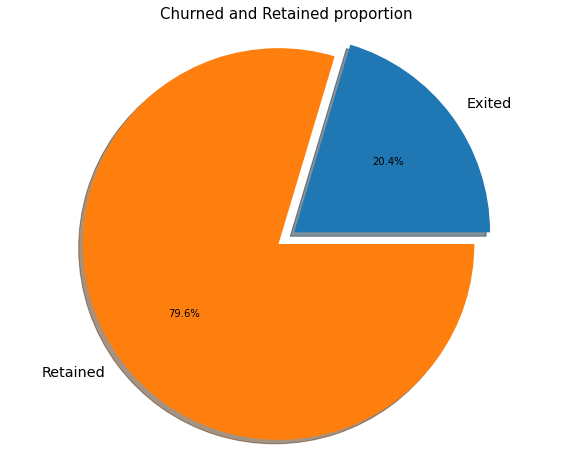

In [48]:
fig, ax = plt.subplots(figsize=(10,8))
data = [df.Exited[df['Exited'] == 1].count(), df.Exited[df['Exited'] == 0].count()]

ax.pie(data, explode=(0, 0.1), labels = ['Exited', 'Retained'], autopct='%1.1f%%', shadow=True)
ax.axis('equal')
plt.title("Churned and Retained proportion", size = 15)
plt.show()

Kita tahu bahwa sekitar 20% pelanggan bank berhenti untuk menggunakan jasa bank, dan ini timpang jauh dan kemungkinan kira memerlukan overlaping data

# Variable Distribution

### Numeric columns

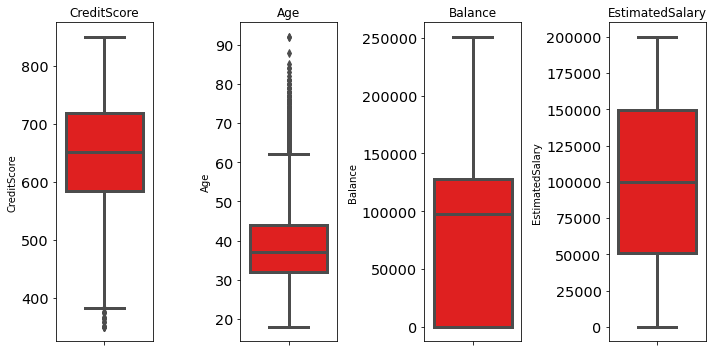

In [73]:
num = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1).set_title(num[i])
    sns.boxplot(y=df[num[i]], color='red')
    plt.tight_layout()

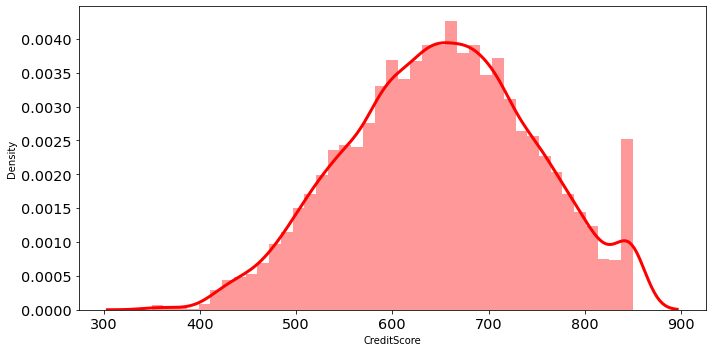

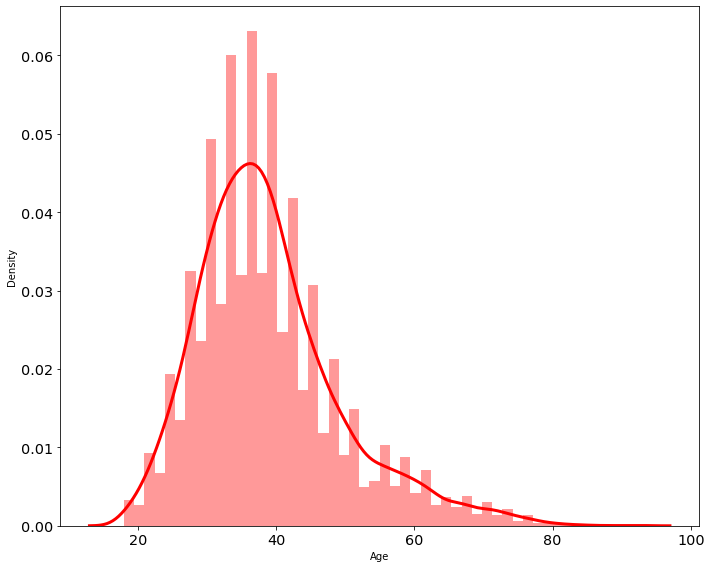

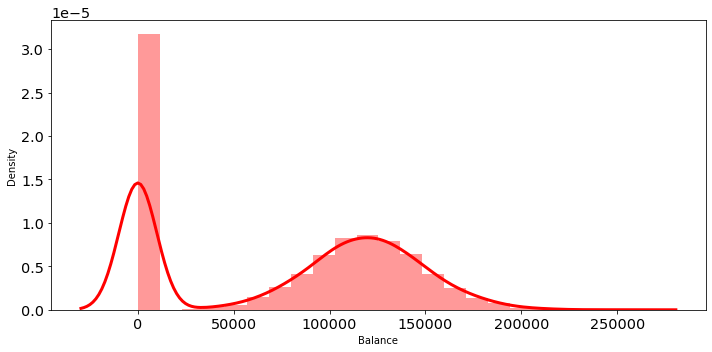

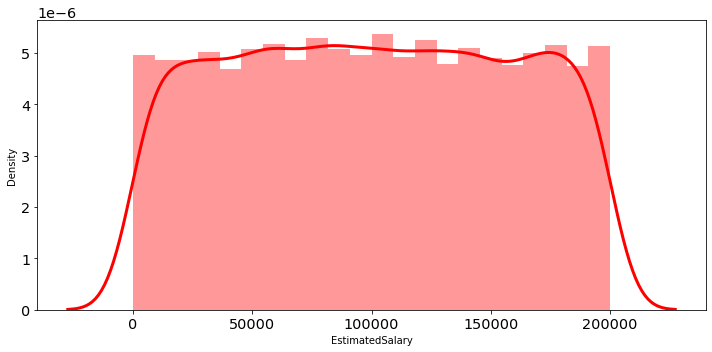

In [79]:
fig, ax = plt.subplots(figsize=(10,8))
for i in range(0, len(num)):
    plt.figure(i)
    sns.distplot(df[num[i]], color='red')
    plt.tight_layout()

#### Report :

1. Sejauh ini tidak ada outlier pada setiap kolom
2. CreditScore terlihat memiliki distribusi normal
3. Kebanyakan customer memiliki kredit <700
4. Variabel umur terlihat skewed kanan yang berarti customer didominasi oleh muda-mudi sekitar 20-40 tahun
5. Customer yang memiliki balance terdistribusi normal kecuali yang tidak memiliki saldo sama sekali
6. EstimatedSalary juga berdistribusi normal sehingga customer memiliki range gaji yang mirip satu sama lain

### Categorical columns

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

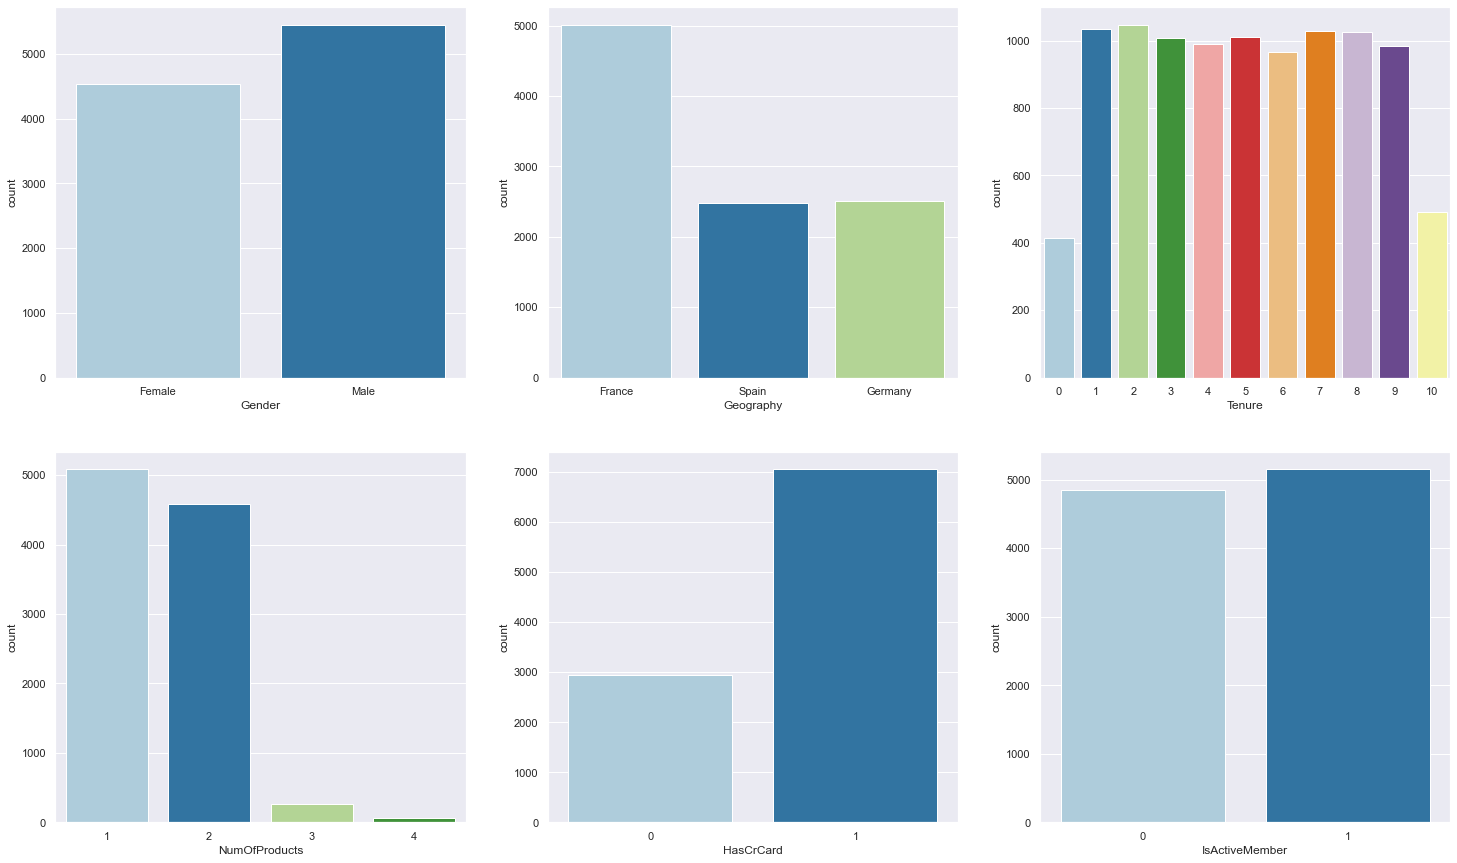

In [80]:
sns.set(rc={'figure.figsize':(25,15)})

fig,axs = plt.subplots(2,3)
sns.set_theme(palette="Paired")
sns.countplot(data = df,x = 'Gender',ax=axs[0,0])
sns.countplot(data = df,x = 'Geography',ax=axs[0,1])
sns.countplot(data = df,x = 'Tenure',ax=axs[0,2])
sns.countplot(data = df,x = 'NumOfProducts',ax=axs[1,0])
sns.countplot(data = df,x = 'HasCrCard',ax=axs[1,1])
sns.countplot(data = df,x = 'IsActiveMember',ax=axs[1,2])